## Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import autokeras as ak

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/forestfires_cleaned.csv", index_col=0)
# Droping area column because we made a new column called log_area by using a log transform
df.drop('area', axis=1, inplace=True)

df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  \
0    7  5      3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   
3    8  6      3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   
4    8  6      3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...   
512  4  3      8    7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   
513  2  4      8    7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0   
514  7  4      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   
515  1  4      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   
516  6  3     11    2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   

     log_area  
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
..        ...  
512  2.006871  
513  4.012592  
514  2.498152  
515  0.000000  
516  0.000000  

[517 rows x 13 columns]

## Checking Data

<AxesSubplot:>

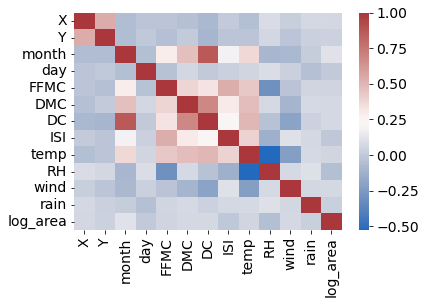

In [3]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [4]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

X         Y     month       day      FFMC       DMC        DC  \
0    0.750  0.428571  0.181818  0.666667  0.870968  0.086492  0.101325   
1    0.750  0.285714  0.818182  0.166667  0.927742  0.118194  0.775419   
2    0.750  0.285714  0.818182  0.833333  0.927742  0.146795  0.796294   
3    0.875  0.571429  0.181818  0.666667  0.941935  0.110958  0.081623   
4    0.875  0.571429  0.181818  1.000000  0.910968  0.172984  0.110590   
..     ...       ...       ...       ...       ...       ...       ...   
512  0.375  0.142857  0.636364  1.000000  0.811613  0.191592  0.771315   
513  0.125  0.285714  0.636364  1.000000  0.811613  0.191592  0.771315   
514  0.750  0.285714  0.636364  1.000000  0.811613  0.191592  0.771315   
515  0.000  0.285714  0.636364  0.833333  0.976774  0.499311  0.711622   
516  0.625  0.142857  0.909091  0.166667  0.784516  0.006547  0.115867   

          ISI      temp        RH      wind     rain  log_area  
0    0.090909  0.192926  0.423529  0.700000  0.00000  0.000000  
1    0.119430  0.508039  0.211765  0.055556  0.00000  0.000000  
2    0.119430  0.398714  0.211765  0.100000  0.00000  0.000000  
3    0.160428  0.196141  0.964706  0.400000  0.03125  0.000000  
4    0.171123  0.295820  0.988235  0.155556  0.00000  0.000000  
..        ...       ...       ...       ...      ...       ...  
512  0.033868  0.823151  0.200000  0.255556  0.00000  0.286875  
513  0.033868  0.633441  0.658824  0.600000  0.00000  0.573586  
514  0.033868  0.610932  0.647059  0.700000  0.00000  0.357102  
515  0.201426  0.752412  0.317647  0.400000  0.00000  0.000000  
516  0.019608  0.308682  0.188235  0.455556  0.00000  0.000000  

[517 rows x 13 columns]

## Breaking Data in X and y

In [5]:
X = df.iloc[:,:-1]

In [6]:
y = df.iloc[:,-1]

# Generating Models

In [8]:
# Using AutoKeras output to help us tune our parameters
# Can adjust hyperpameters, activation functions, and layer stucture based on our findings

auto_tune = ak.StructuredDataRegressor(max_trials=10, 
                                       overwrite=True,
                                       loss='mean_squared_error',
                                       output_dim=1,
                                       project_name='auto_keras'
                                       )

X_train, X_test, y_train, y_test = train_test_split(X, y)

auto_tune.fit(X_train, y_train, validation_split = 0.15, epochs = 10)
y_hat = auto_tune.predict(X_test)
print(auto_tune.evaluate(X_test, y_test))

auto_tune_mod = auto_tune.export_model()
print(auto_tune_mod.summary())


Trial 10 Complete [00h 00m 07s]
val_loss: 0.0034166674595326185

Best val_loss So Far: 0.0034166674595326185
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 9/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 10/10
13/13 [=========

In [9]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 50

# Defining batch size
bs = 32

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [10]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [11]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1561
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1327
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1131
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0971
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 6/50
13/13 [==============================] - 0s 4ms/

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0745
Time:                        

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


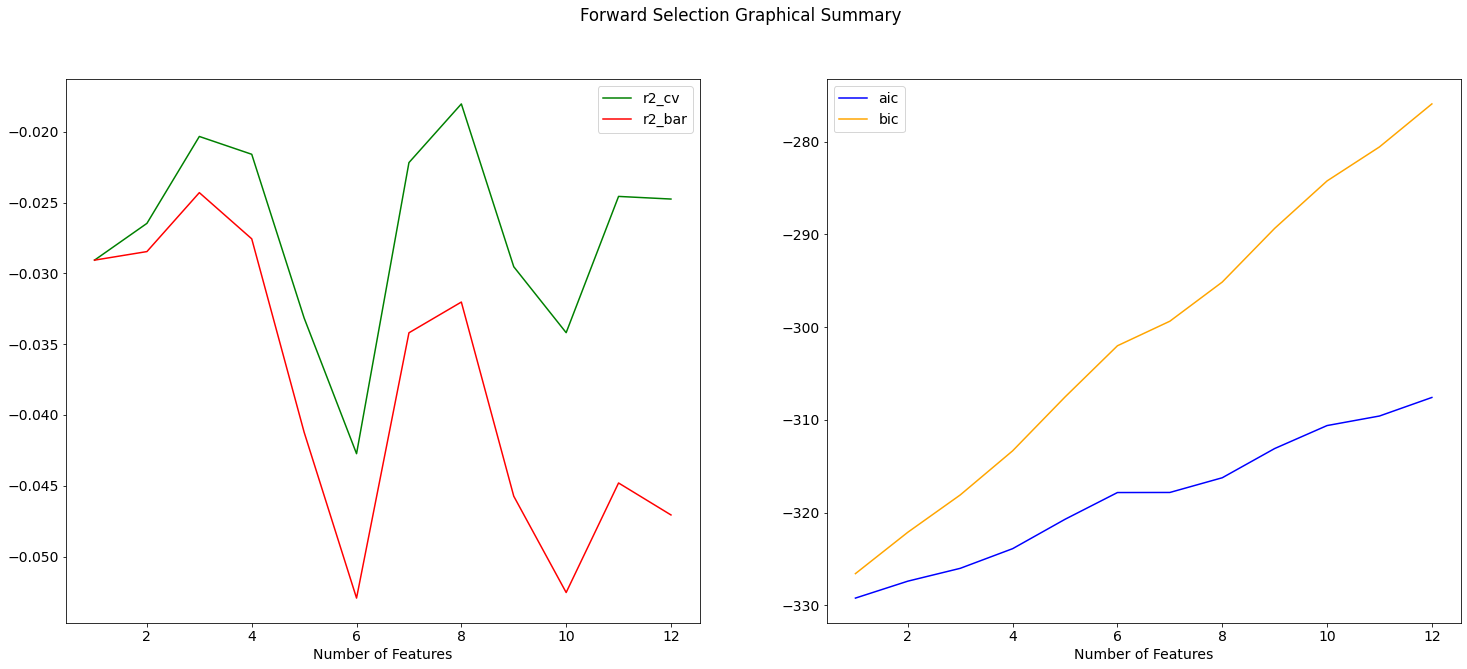

In [12]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [13]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [14]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 12)                156       
                                                                 
 dense_135 (Dense)           (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.0778
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0608
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0574
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 6/50
13/13 [==============================] - 0s 3

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 12)                156       
                                                                 
 dense_145 (Dense)           (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0745
Time:                       

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


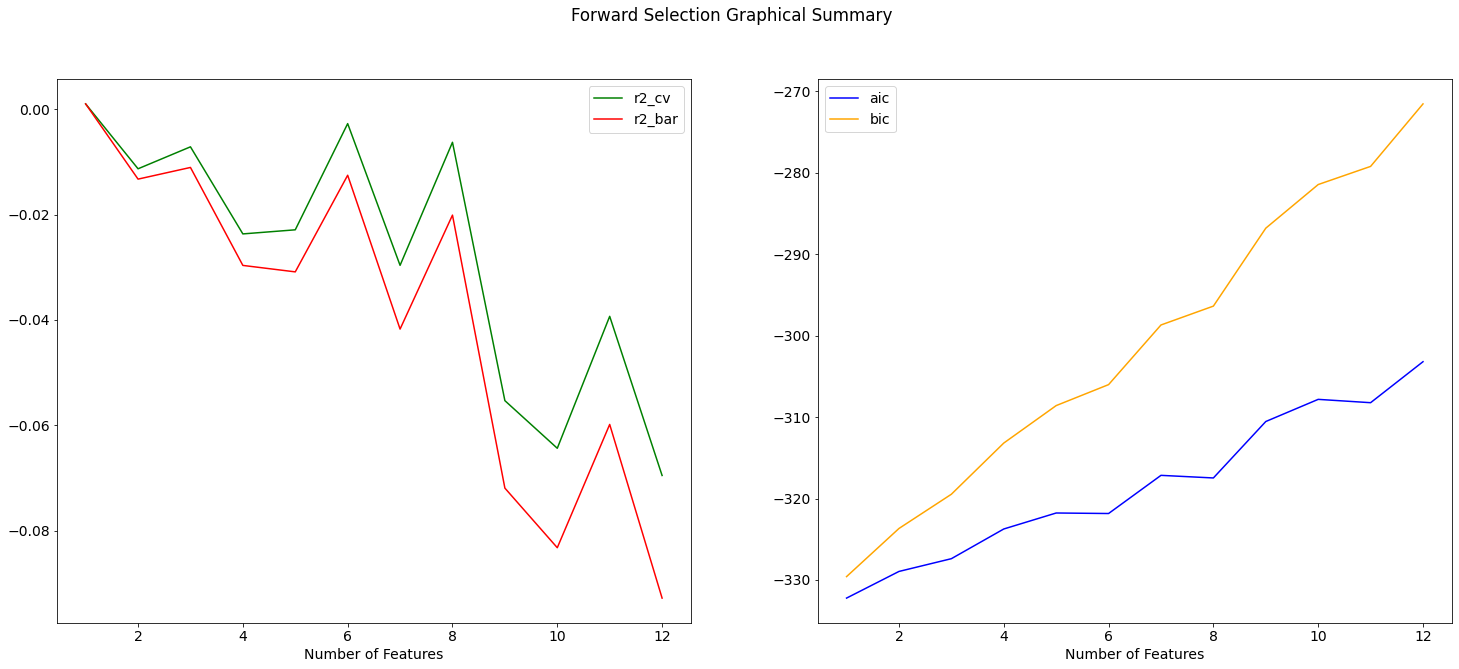

In [15]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [16]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'relu'

In [17]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_132"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_266 (Dense)           (None, 12)                156       
                                                                 
 dense_267 (Dense)           (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.0636
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0636
Epoch 3/50
13/13 [==============================] - 0s 16ms/step - loss: 0.0636
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0636
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 6/50
13/13 [==============================] - 0s

Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_276 (Dense)           (None, 12)                156       
                                                                 
 dense_277 (Dense)           (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sat, 02 Apr 2022   Prob (F-statistic):             0.0745
Time:                      

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


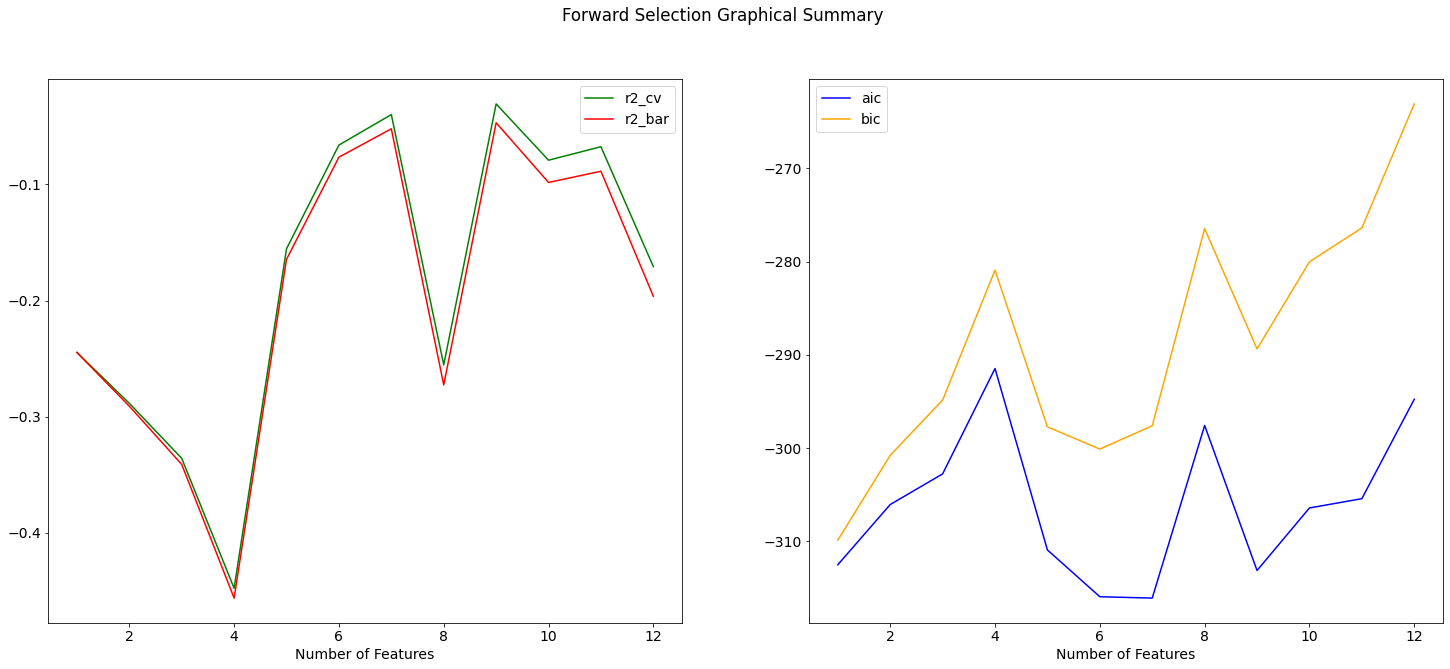

In [18]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [19]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [20]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_198"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_398 (Dense)           (None, 12)                156       
                                                                 
 dense_399 (Dense)           (None, 25)                325       
                                                                 
 dense_400 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 0.1301
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0929
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0693
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0555
Ep

Model: "sequential_203"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_413 (Dense)           (None, 12)                156       
                                                                 
 dense_414 (Dense)           (None, 25)                325       
                                                                 
 dense_415 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


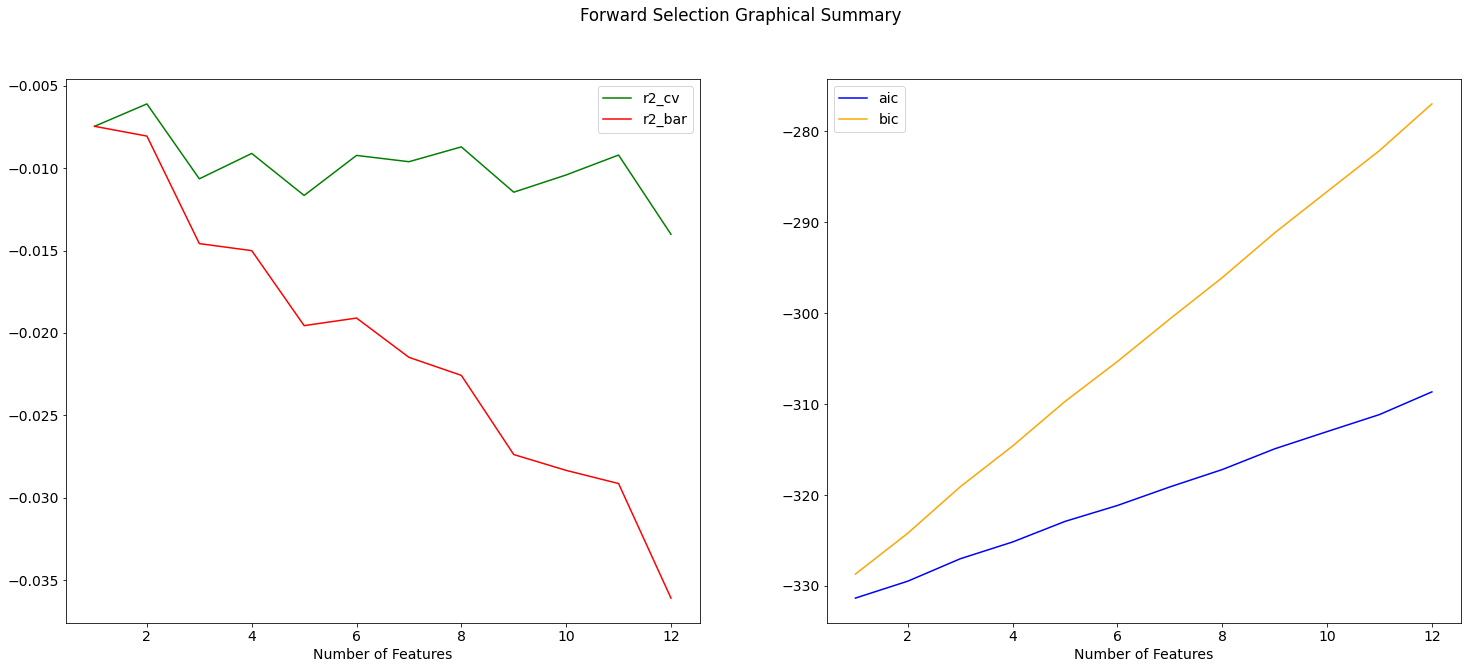

In [21]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [22]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [23]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_264"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_596 (Dense)           (None, 12)                156       
                                                                 
 dense_597 (Dense)           (None, 25)                325       
                                                                 
 dense_598 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0673
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0407
Ep

Model: "sequential_269"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_611 (Dense)           (None, 12)                156       
                                                                 
 dense_612 (Dense)           (None, 25)                325       
                                                                 
 dense_613 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


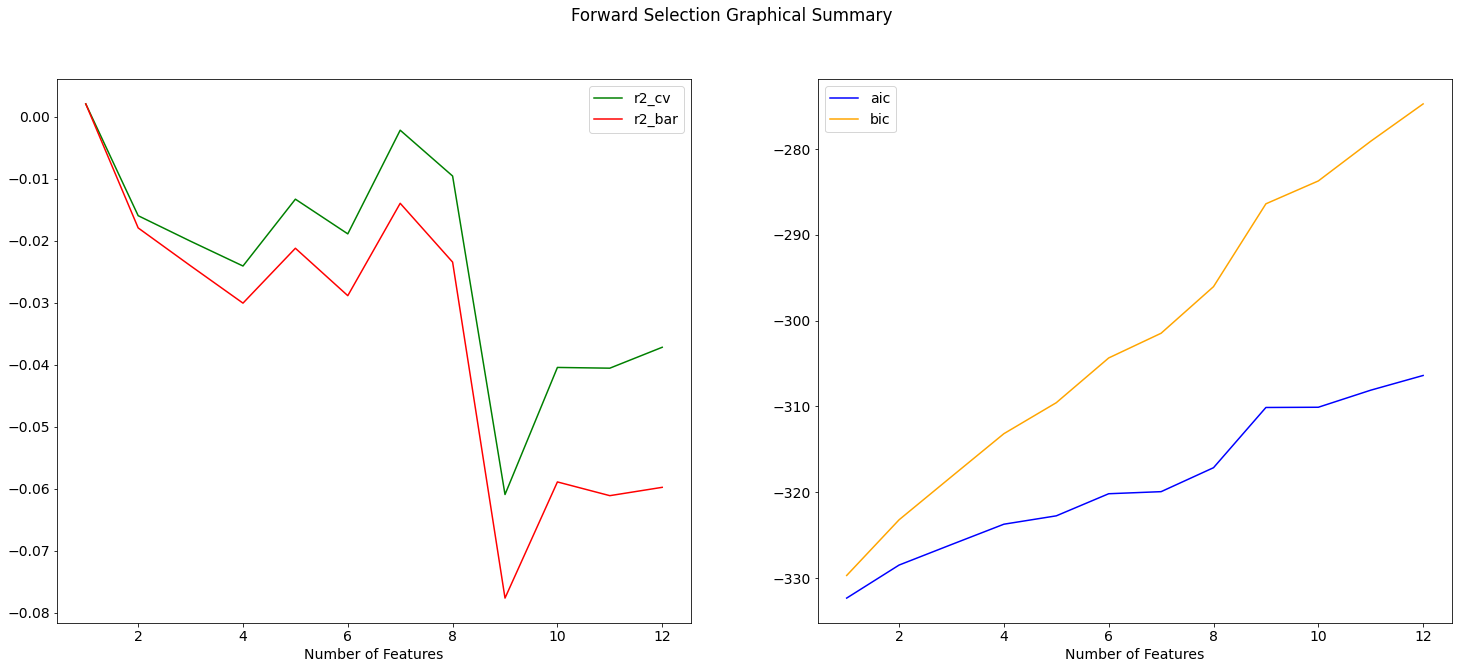

In [24]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [25]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'relu'

In [26]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_330"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_794 (Dense)           (None, 12)                156       
                                                                 
 dense_795 (Dense)           (None, 25)                325       
                                                                 
 dense_796 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0636
Ep

Model: "sequential_335"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_809 (Dense)           (None, 12)                156       
                                                                 
 dense_810 (Dense)           (None, 25)                325       
                                                                 
 dense_811 (Dense)           (None, 1)                 26        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic: 

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


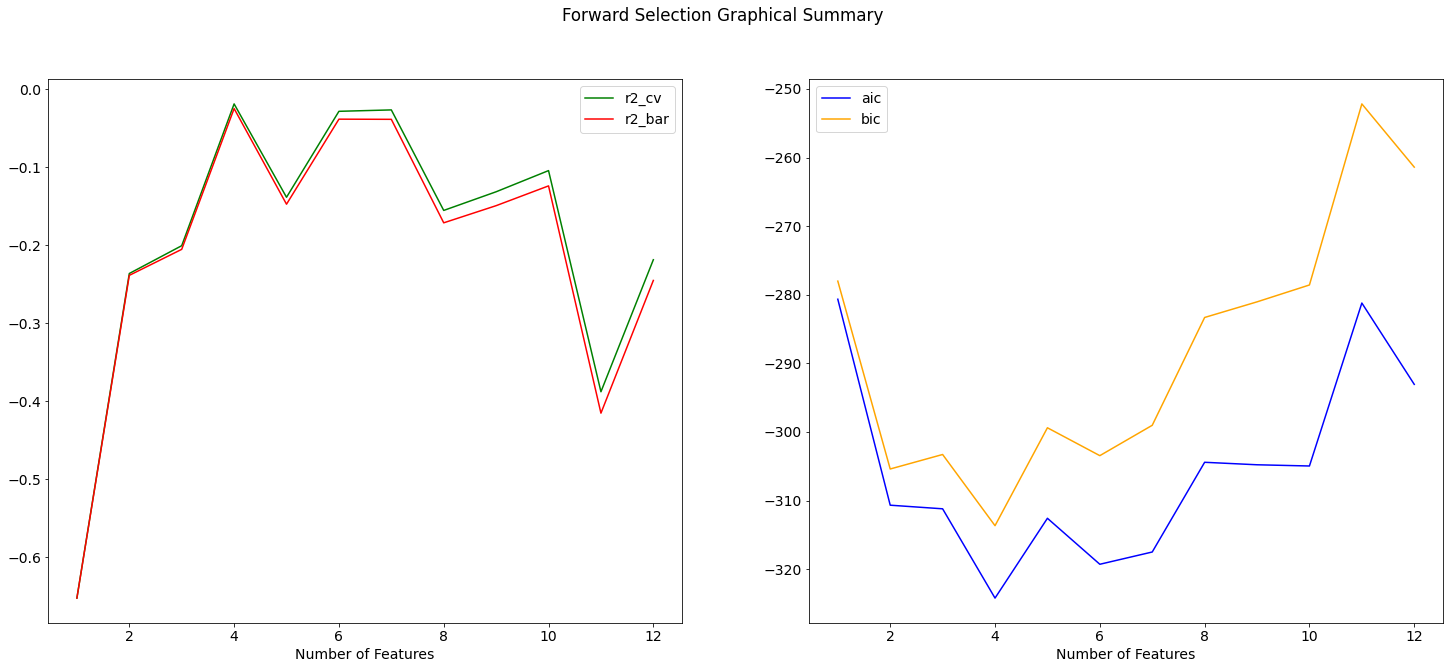

In [27]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 4 Layer Neural Networks

### Sigmoid Activation Function

In [28]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [29]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_396"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_992 (Dense)           (None, 12)                156       
                                                                 
 dense_993 (Dense)           (None, 25)                325       
                                                                 
 dense_994 (Dense)           (None, 13)                338       
                                                                 
 dense_995 (Dense)           (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 3/50
13/13 [==========

Model: "sequential_401"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1012 (Dense)          (None, 12)                156       
                                                                 
 dense_1013 (Dense)          (None, 25)                325       
                                                                 
 dense_1014 (Dense)          (None, 13)                338       
                                                                 
 dense_1015 (Dense)          (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


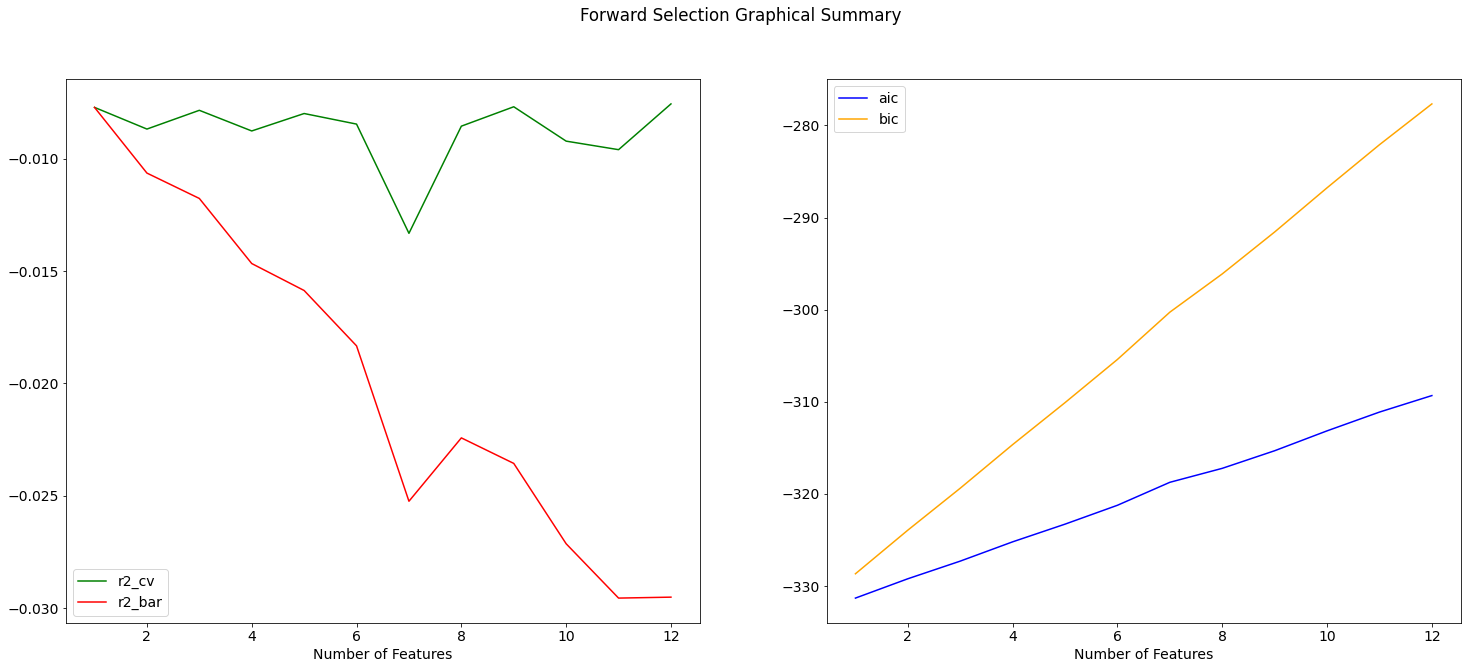

In [30]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [31]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [32]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_462"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1256 (Dense)          (None, 12)                156       
                                                                 
 dense_1257 (Dense)          (None, 25)                325       
                                                                 
 dense_1258 (Dense)          (None, 13)                338       
                                                                 
 dense_1259 (Dense)          (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 3/50
13/13 [==========

Model: "sequential_467"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1276 (Dense)          (None, 12)                156       
                                                                 
 dense_1277 (Dense)          (None, 25)                325       
                                                                 
 dense_1278 (Dense)          (None, 13)                338       
                                                                 
 dense_1279 (Dense)          (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


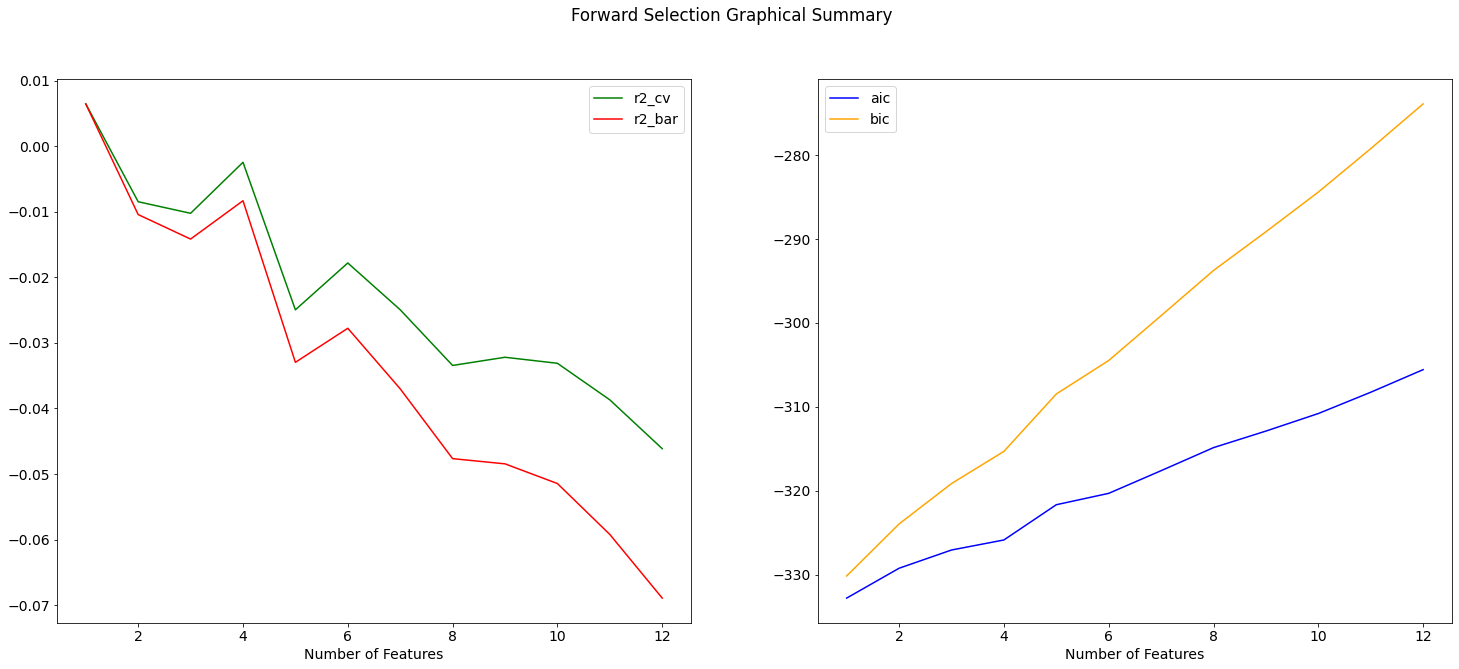

In [33]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [34]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'relu'

In [35]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_528"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1520 (Dense)          (None, 12)                156       
                                                                 
 dense_1521 (Dense)          (None, 25)                325       
                                                                 
 dense_1522 (Dense)          (None, 13)                338       
                                                                 
 dense_1523 (Dense)          (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0630
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 3/50
13/13 [==========

Model: "sequential_533"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1540 (Dense)          (None, 12)                156       
                                                                 
 dense_1541 (Dense)          (None, 25)                325       
                                                                 
 dense_1542 (Dense)          (None, 13)                338       
                                                                 
 dense_1543 (Dense)          (None, 1)                 14        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038


/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


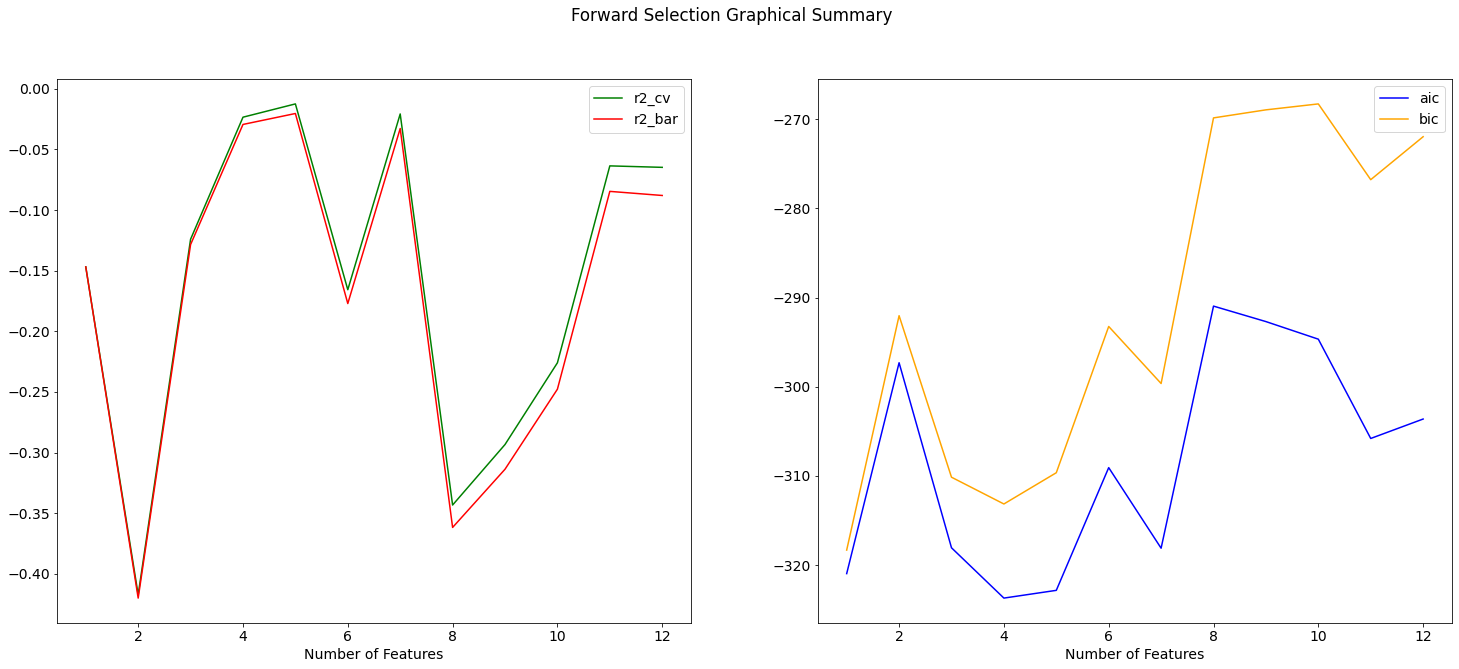

In [36]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)